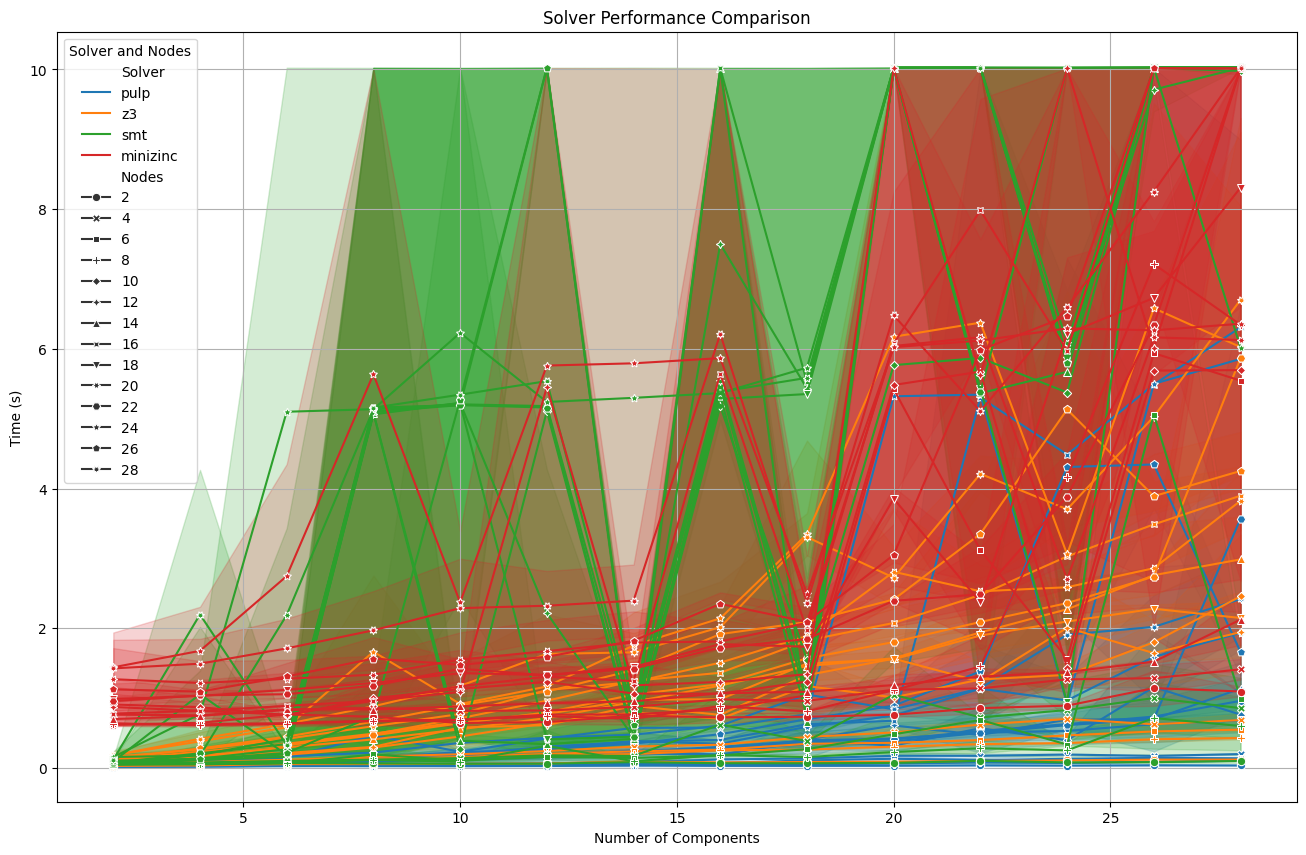

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
# Data provided
import os


# Directory containing the JSON files
directory = '.'

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as f:
            data = json.load(f)
            # Convert the JSON data to a DataFrame with appropriate column names
            df = pd.DataFrame(data, columns=["Solver", "Time", "Nodes", "Components", "Output"])
            # Append the DataFrame to the list
            dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Calculate the mean of the "Time" values grouped by "Solver", "Nodes", and "Components"
mean_times = df.groupby(['Solver', 'Nodes', 'Components'])['Time'].mean().reset_index()

# Convert the result to a new DataFrame
data = pd.DataFrame(mean_times)


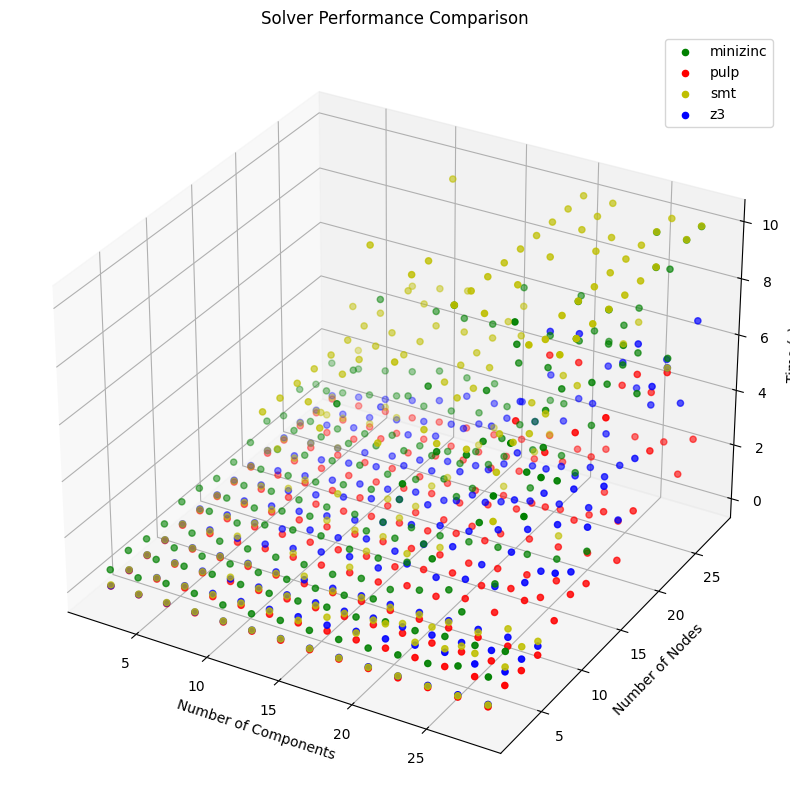

In [20]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {'z3': 'b', 'pulp': 'r','minizinc':'g','smt': 'y'}

# Plot data
for solver in data['Solver'].unique():
    solver_data = data[data['Solver'] == solver]
    ax.scatter(solver_data['Components'], solver_data['Nodes'], solver_data['Time'], c=colors[solver], label=solver)

ax.set_title('Solver Performance Comparison')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Number of Nodes')
ax.set_zlabel('Time (s)')
ax.legend()

plt.show()

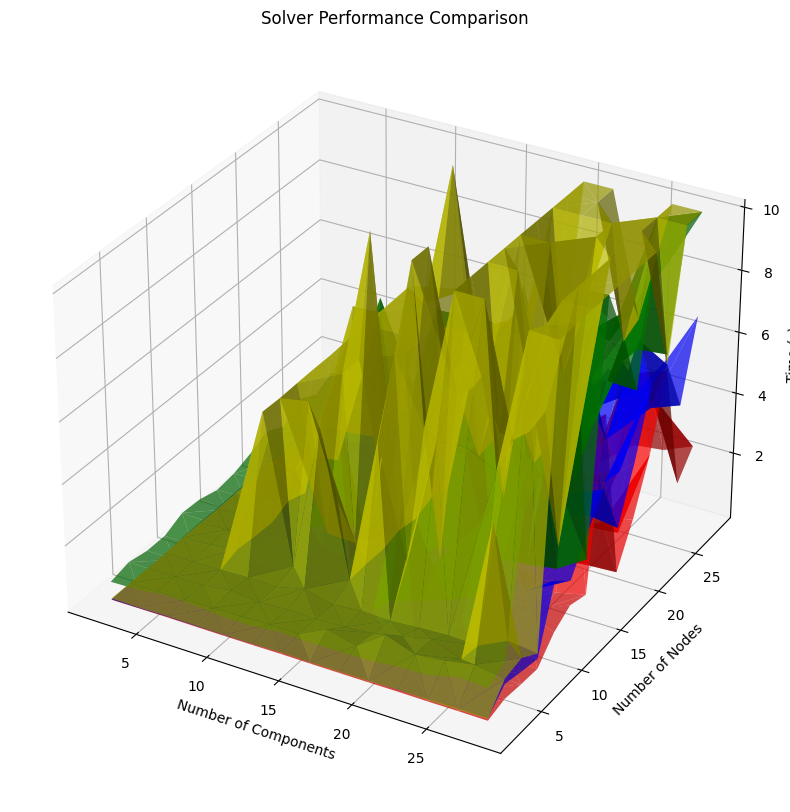

In [14]:
df = pd.DataFrame(data, columns=["Solver", "Time", "Nodes", "Components"])

# Averaging duplicate components and nodes
#df_avg = df.groupby(['Solver', 'Nodes', 'Components']).mean().reset_index()

# Plotting
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')


# Plot data
for solver in data['Solver'].unique():
    solver_data = df_avg[df_avg['Solver'] == solver]
    x = solver_data['Components']
    y = solver_data['Nodes']
    z = solver_data['Time']

    # Create surface plot
    ax.plot_trisurf(x, y, z, color=colors[solver], alpha=0.7, label=solver)

ax.set_title('Solver Performance Comparison')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Number of Nodes')
ax.set_zlabel('Time (s)')

plt.show()

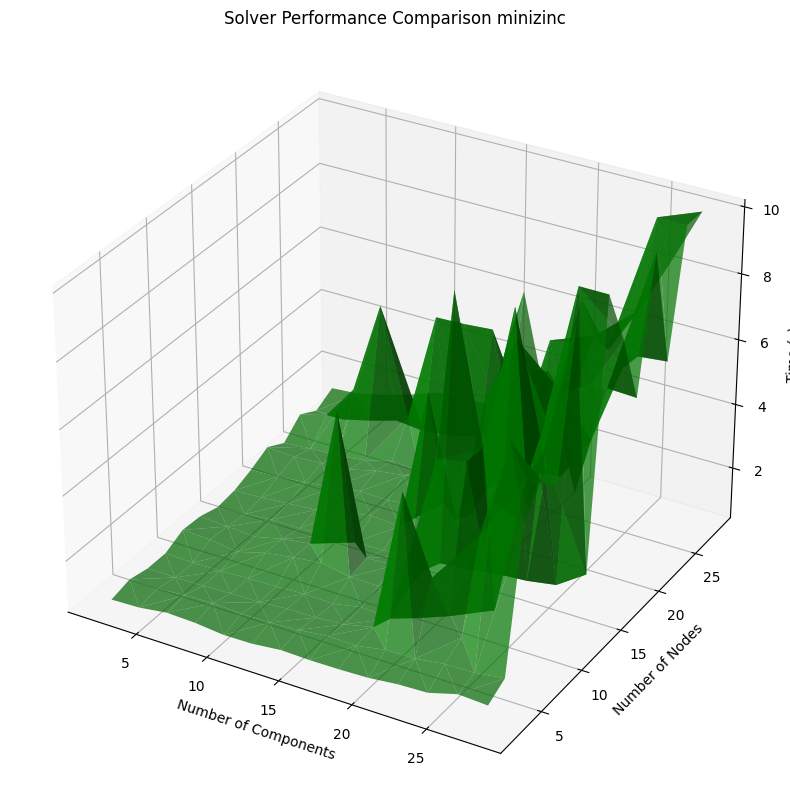

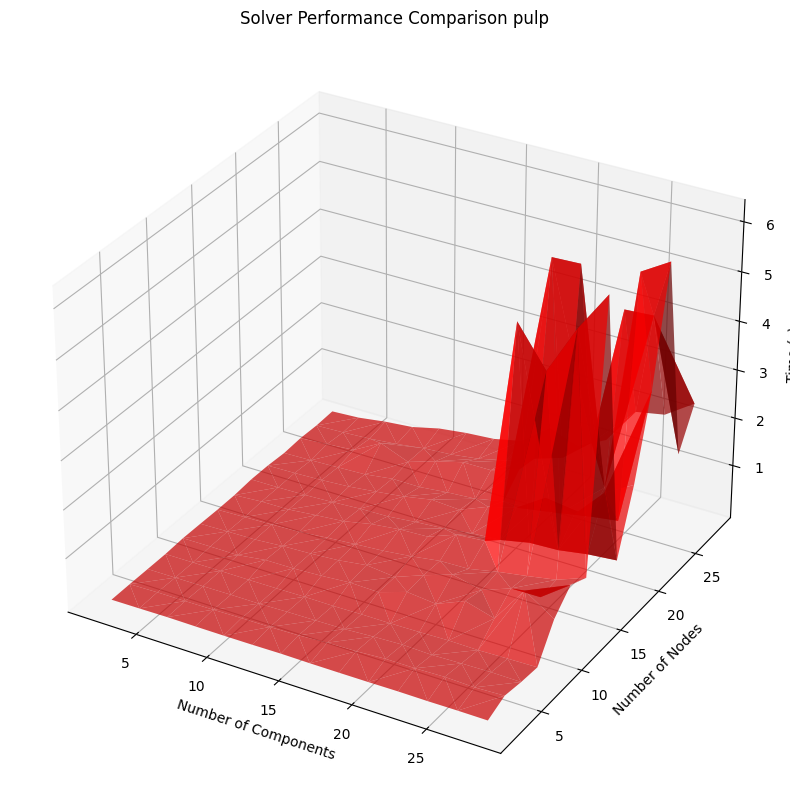

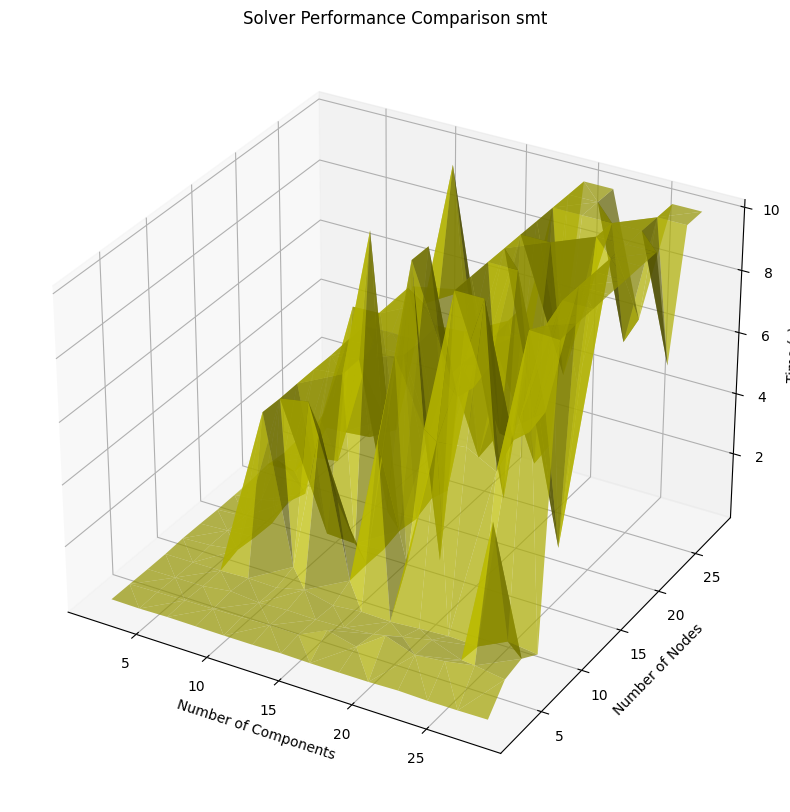

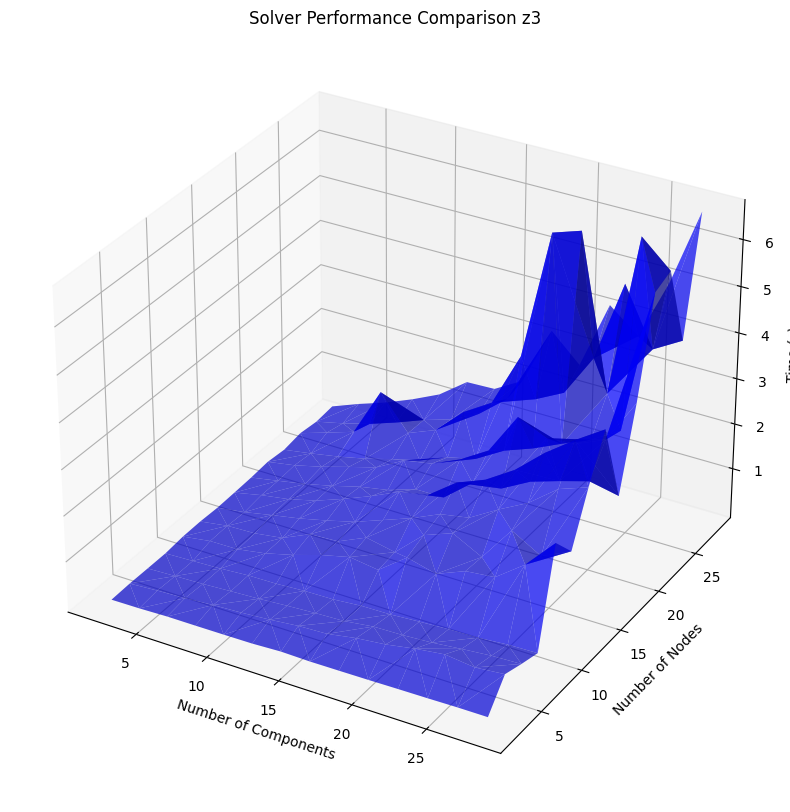

In [18]:


# Plot data
for solver in data['Solver'].unique():
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111, projection='3d')
    solver_data = df_avg[df_avg['Solver'] == solver]
    x = solver_data['Components']
    y = solver_data['Nodes']
    z = solver_data['Time']

    # Create surface plot
    ax.plot_trisurf(x, y, z, color=colors[solver], alpha=0.7, label=solver)

    ax.set_title(f'Solver Performance Comparison {solver}')
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Number of Nodes')
    ax.set_zlabel('Time (s)')

    plt.show()